# Project: Communicate Data Findings [Fifa GoBike System Data]

<a id='intro'></a>

## Dataset Description 

> Fifa GoBike System Data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

> The dataset consists of 183412 rows and 16 columns --> 2 columns converted from string to datetime, 9 numerical columns and 5 object(string) columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

df = pd.read_csv(r"C:\Users\zizo\Downloads\Data Visualization\201902-fordgobike-tripdata.csv")
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df.dropna(inplace=True)

<a id='engineering'></a>
## Feature Engineering
> Creating col for uses' ages.

> Creating columns for Start day, weekday, and hour

> Creating a new column that check if the end station is the same as the start station or not

In [2]:
# Calculating the user age related to fixed year 2019
df['age'] = (2019 - df['member_birth_year'])
# In weekday 0 refers to Monday, and 6 refers to sunday.
df['start_weekday'] = df['start_time'].dt.weekday
df['start_hour'] = df['start_time'].dt.hour

<a id='uni'></a>
## Univariate Exploration

In [3]:
def get_bins(maxValue, minValue, numOfValues):
    """
    get_bins function takes 3 arguments maxValue, minValue, numOfValues
    and uses Sturgis rule to calculate the number of bins, then uses 
    the number of bins to create the bins using numpy
    
    Args: 
     - maxValue: which is the max value in the series.
     - minValue: which is the min value in the series.
     - numOfValues: which is the number of rows in the series.
    
    return: numpy array have the splitted bins
    """
    binsNum = math.ceil(1 + 3.3*math.log(numOfValues))
    step = (maxValue - minValue)/binsNum
    arr = np.arange(minValue, maxValue + step, step)
    return arr


### What's the most age in the dataset?

#### The age has a range from 22 to 36 which related to the age of the workers, and the mean age is 35.

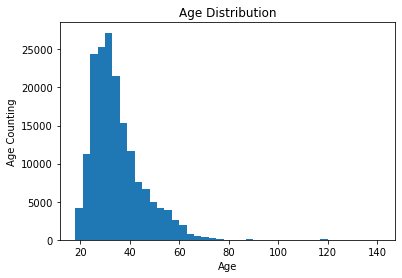

In [4]:
bins_age = get_bins(df['age'].max(), df['age'].min(), len(df['age']))
plt.hist(data=df, x='age', bins=bins_age)
plt.xlabel("Age")
plt.ylabel("Age Counting")
plt.title("Age Distribution");

### What's the most trip duration in the dataset?

#### The average trip duration is ranged from 200 to 2000 sec.

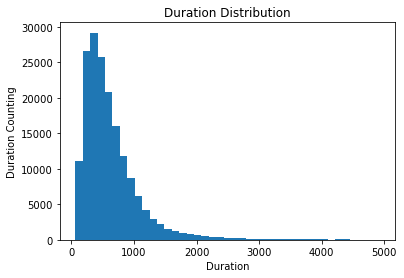

In [5]:
maxValue = 3*df['duration_sec'].std()
bins_duration = get_bins(maxValue, df['duration_sec'].min(), len(df['duration_sec']))
plt.hist(data=df, x='duration_sec', bins=bins_duration)
plt.xlabel("Duration")
plt.ylabel("Duration Counting")
plt.title("Duration Distribution");

### Which day and hour has the most and the least trip count? 

#### We saw here that 3 (thursday) is the most day of rides

#### We saw here that 8, 9 and 17, 18 is the most hour for starting rides, which expected because its work times.

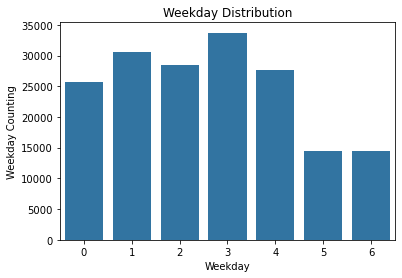

In [6]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x='start_weekday', color=base_color)
plt.xlabel("Weekday")
plt.title("Weekday Distribution");
plt.ylabel("Weekday Counting");

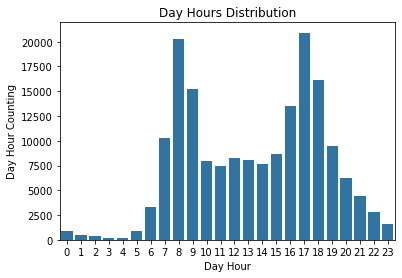

In [7]:
sb.countplot(data = df, x='start_hour', color=base_color)
plt.title("Day Hours Distribution");
plt.xlabel("Day Hour")
plt.ylabel("Day Hour Counting");

<a id='bi'></a>
## Bivariate Exploration

### what is the relation between age and duration?

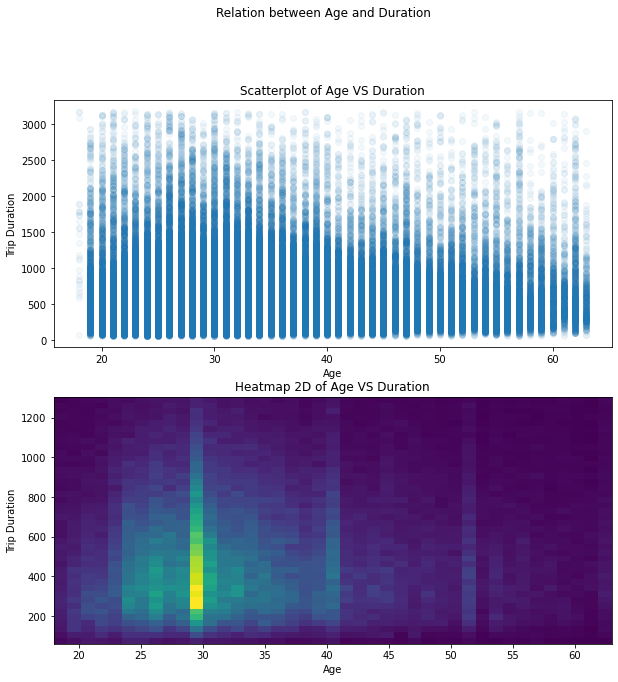

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.suptitle("Relation between Age and Duration", y = 1.01)

data = df.query('duration_sec<duration_sec.quantile(0.99) and age<age.quantile(0.99)')
ax[0].scatter(data=data, x='age', y='duration_sec', alpha=0.05)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Trip Duration")
ax[0].set_title("Scatterplot of Age VS Duration")


bins_x = get_bins(data['age'].max(), 
                  data['age'].min(), len(data['age']))
bins_y = get_bins(3*data['duration_sec'].std(), 
                  data['duration_sec'].min(), len(data['duration_sec']))
ax[1].hist2d(data=data, x='age', y='duration_sec', bins=[bins_x, bins_y]);
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Trip Duration")
ax[1].set_title("Heatmap 2D of Age VS Duration");

## Multivariate Exploration

### What's the relation between member_gender, age, and duration in sec?

#### In the high ages males spend much duration than females and other types.

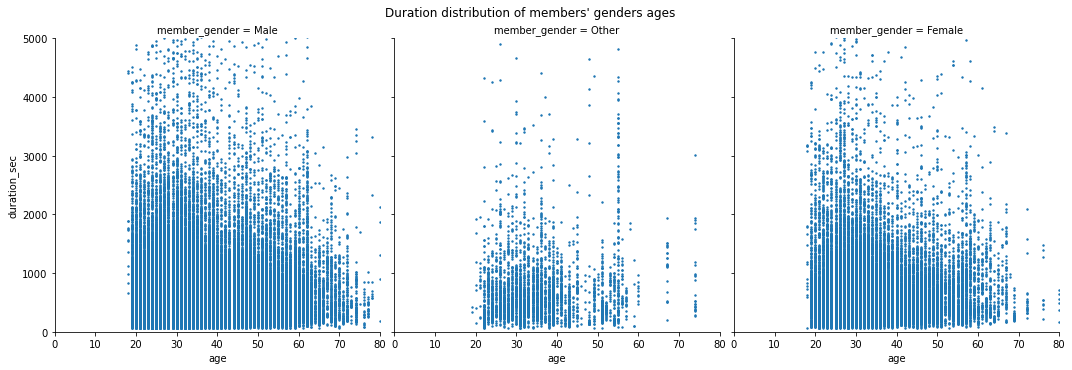

In [9]:
g = sb.FacetGrid(data=df, col='member_gender', col_wrap=3, height=5);
g.map(plt.scatter, 'age', 'duration_sec', s=2);
g.set(ylim=(0, 5000), xlim=(0, 80));
g.fig.suptitle("Duration distribution of members' genders ages", y=1.02);

## Conclusions

We can conclude that:
 - Customers do longer trips than subscribers.
 - Females - in general -  do longer trips than males and others.
 - Older males do longer trips than females and others.
 - Most trips are on Tuesday and Wednesday, and the less is on the weekend days.
 - Most trips are during the hours of going to work and returning from the work.

In [10]:
!jupyter nbconvert "Slide deck.ipynb" --to slides --post serve  --no-input --no-prompt


[NbConvertApp] Converting notebook Slide deck.ipynb to slides
[NbConvertApp] Writing 868158 bytes to Slide deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "E:\Others\Programs\Annaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "E:\Others\Programs\Annaconda\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "E:\Others\Programs\Annaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "E:\Others\Programs\Annaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "E:\Others\Programs\Annaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fi